# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

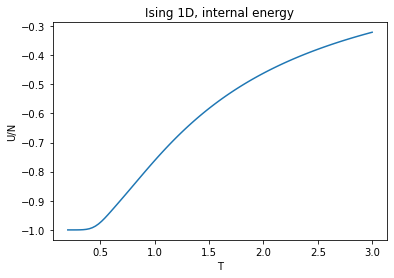

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

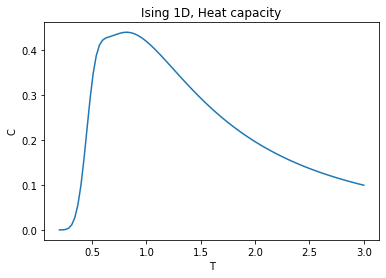

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

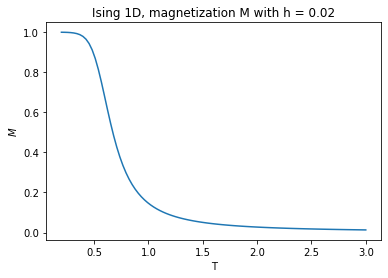

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

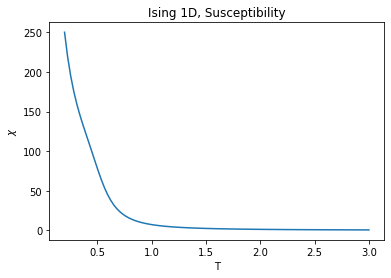

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with <span style="color:blue">both sampling methods, Metropolis and Gibbs</span>.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### Solution:

I first performed a calibration run to decide how much to wait for the system to reach equilibrium. I performed 10,000 MC steps for each sampling methods, for each value of temperature between 0.5 and 2.0 (with step 0.1), once starting from a 0-temperature state (all spins parallel) and once again from an infinite-temperature state (spins randomly generated).

I used a non-zero value for the magnetic field ($h=0.02$) to check the behaviour of magnetization. This value should be close enough to $0$ not to affect the other parameters (all values are given in natural units).

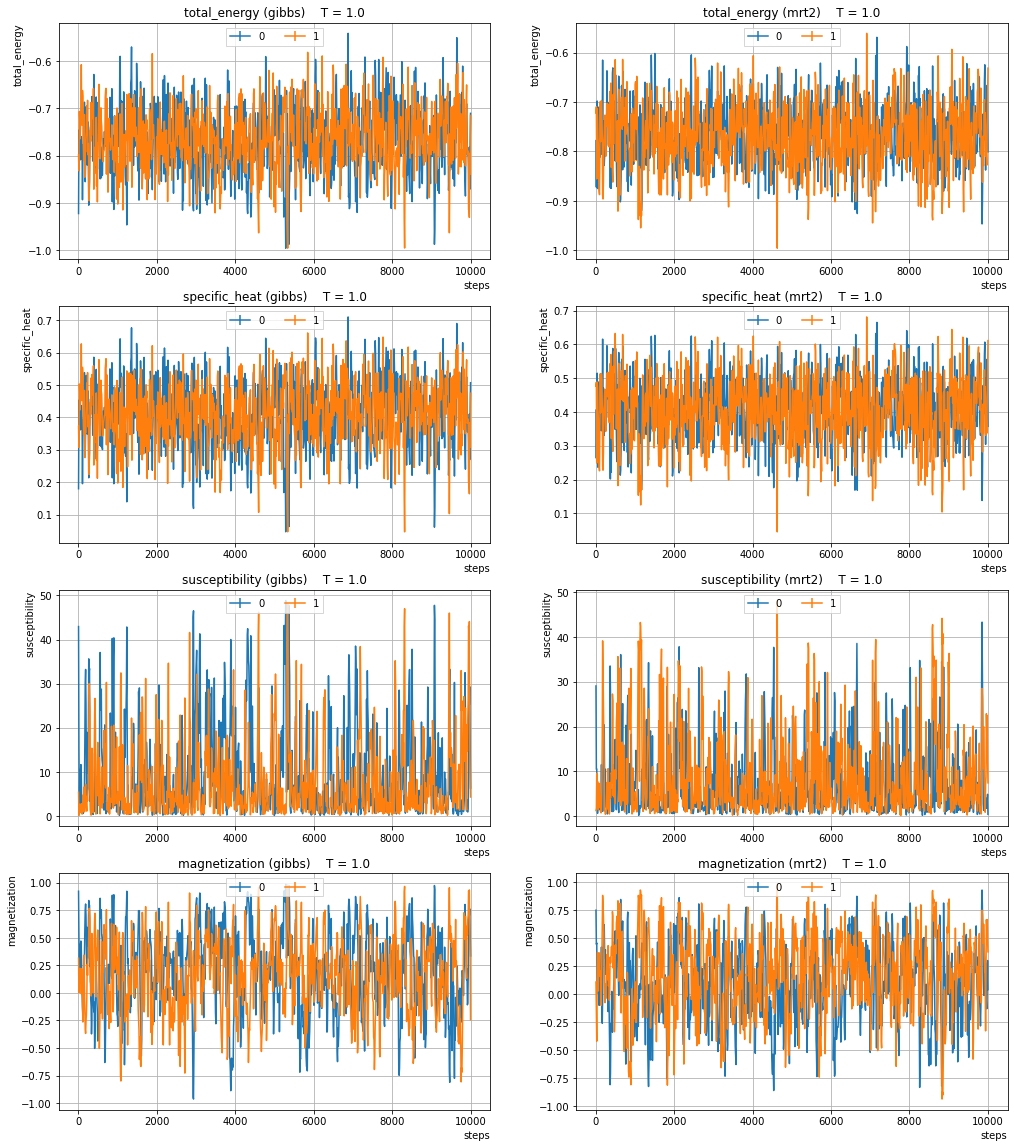

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

variables = ['total_energy', 'specific_heat', 'susceptibility', 'magnetization']
T = [0, 1]
algos = ['gibbs', 'mrt2']

pre_calibration, calibration = dict(), dict()
blocks, cycles, temperature = dict(), dict(), dict()
for var in variables:
    pre_calibration[var], calibration[var] = dict(), dict()
    blocks[var], cycles[var], temperature[var] = dict(), dict(), dict()
    for algo in algos:
        pre_calibration[var][algo], calibration[var][algo] = dict(), dict()
        blocks[var][algo], cycles[var][algo], temperature[var][algo] = dict(), dict(), dict()
        for t in T:
            name = algo + '_calibration'
            if t > 0:
                name = name + '_infinity'
            else:
                name = name + '_0'
            pre_calibration[var][algo][t] = pd.read_csv(f'ising_{name}/out/{var}.dat', delimiter='\t')
            blocks[var][algo][t] = pre_calibration[var][algo][t].iloc[-1, 0]
            cycles[var][algo][t] = int(pre_calibration[var][algo][t].shape[0] / blocks[var][algo][t]) #n of cycles is n of rows / n of blocks
            cycles[var][algo][t] = np.arange(cycles[var][algo][t])
            temperature[var][algo][t] = (cycles[var][algo][t]+5)/10

            #create a data frame dictionary to store data frames
            calibration[var][algo][t] = {elem : pd.DataFrame() for elem in cycles[var][algo][t]}
            for key in calibration[var][algo][t].keys():
                calibration[var][algo][t][key] = pre_calibration[var][algo][t].iloc[blocks[var][algo][t] * key : blocks[var][algo][t] * (key+1)]
                #print(var, algo, t, temperature[var][algo][t][key])
                #print(calibration[var][algo][t][key])
                
blocksize = 10
example = 5
fig, axs = plt.subplots(4, 2, figsize=(17,20))
for ax, var in zip(axs, variables):
    for a, algo in zip(ax, algos):
        for t in T:
            a.errorbar(blocksize*calibration[var][algo][t][example]['BLOCK:'], calibration[var][algo][t][example].iloc[:,1], yerr=0, label=t)
        a.set_title(var+' ('+algo+')    T = '+str(temperature[var][algo][t][example]))
        a.set_xlabel('steps', loc='right')
        a.set_ylabel(var, loc='top')
        a.grid(True)
        a.legend(loc='upper center', ncol=3, fancybox=False)
    
plt.show()

These plots are being shown using blocking average (with blocks of size 10) for visualization purposes (they would be unreadable otherwise). The results don't change anyways. I also chose a specific temperature to show, but again the results are the same for every temperature.

For both sampling methods, for both initial configurations the system finds equilibrium almost immediately, so in the simulation I will not wait any time to start sampling.

So I performed my simulation employing the usual 1000 blocks of size 1000. I used a null magnetic field ($h=0$) to compute all quantities bar magnetization, for which I used a magnetic field of $h=0.02$.

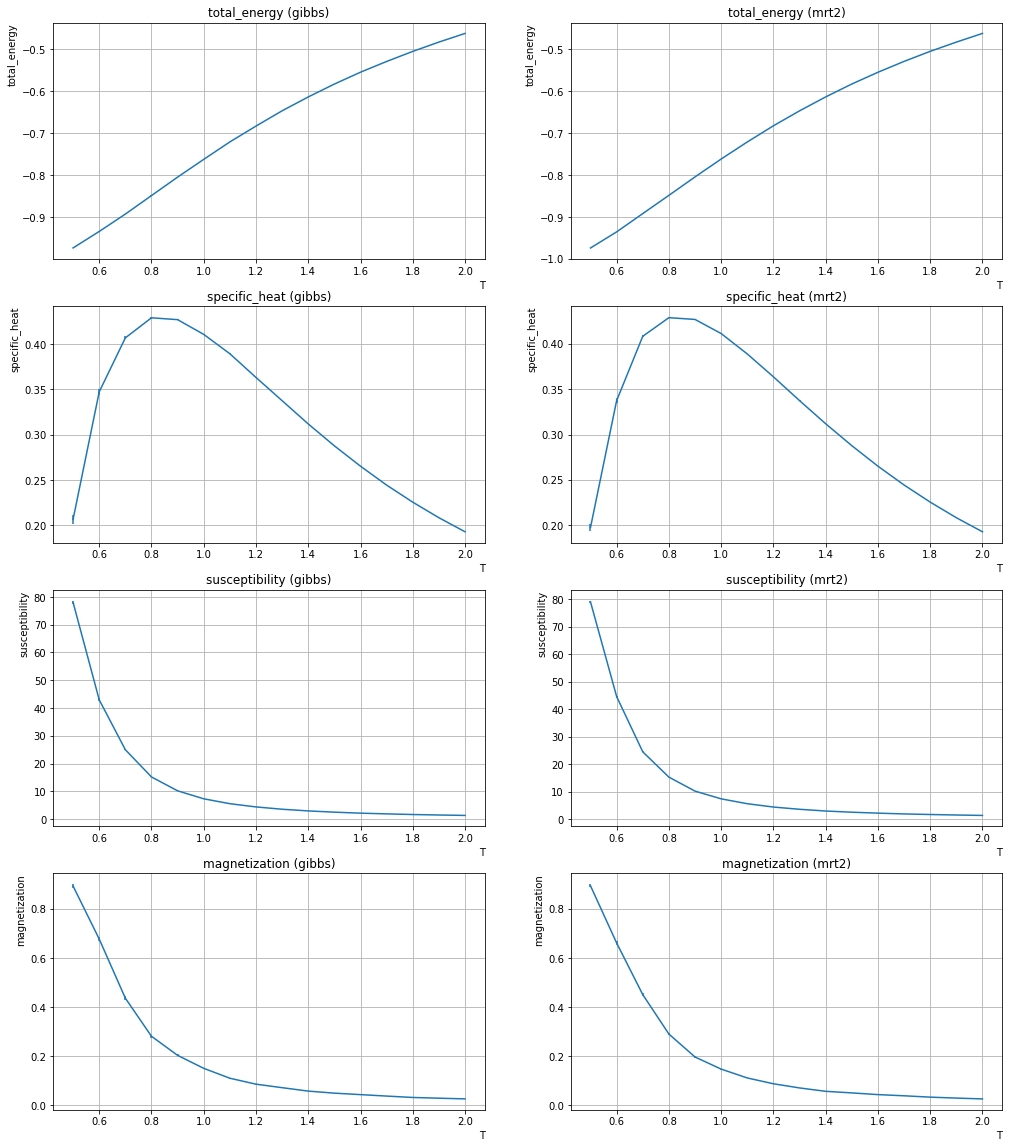

In [20]:
variables = ['total_energy', 'specific_heat', 'susceptibility', 'magnetization']
mag = [0, 0.02]
algos = ['gibbs', 'mrt2']

raw_data, data = dict(), dict()
blocks, cycles, temperature = dict(), dict(), dict()
for var in variables:
    raw_data[var], data[var] = dict(), dict()
    blocks[var], cycles[var], temperature[var] = dict(), dict(), dict()
    for algo in algos:
        raw_data[var][algo], data[var][algo] = dict(), dict()
        blocks[var][algo], cycles[var][algo], temperature[var][algo] = dict(), dict(), dict()
        for h in mag:
            name = algo
            if h > 0:
                name = name + '_m'
            raw_data[var][algo][h] = pd.read_csv(f'ising_{name}/out/{var}.dat', delimiter='\t')
            #print(raw_energy[algo][h])
            blocks[var][algo][h] = raw_data[var][algo][h].iloc[-1, 0]
            cycles[var][algo][h] = int(raw_data[var][algo][h].shape[0] / blocks[var][algo][h]) #n of cycles is n of rows / n of blocks
            cycles[var][algo][h] = np.arange(cycles[var][algo][h])
            temperature[var][algo][h] = (cycles[var][algo][h]+5)/10

            #create a data frame dictionary to store data frames
            data[var][algo][h] = {elem : pd.DataFrame() for elem in cycles[var][algo][h]}
            for key in data[var][algo][h].keys():
                data[var][algo][h][key] = raw_data[var][algo][h].iloc[blocks[var][algo][h] * key : blocks[var][algo][h] * (key+1)]
                #print(var, algo, h, temperature[var][algo][h][key])
                #print(data[var][algo][h][key])
                #print(data[var][algo][h][key].iloc[-1,3])
                
blocksize = 1000
x, std = dict(), dict()
for var in variables:
    x[var], std[var] = dict(), dict()
    for algo in algos:
        x[var][algo], std[var][algo] = dict(), dict()
        for h in mag:
            x[var][algo][h], std[var][algo][h] = list(), list()
            for key in data[var][algo][h].keys():
                x[var][algo][h].append(data[var][algo][h][key].iloc[-1,2])
                std[var][algo][h].append(data[var][algo][h][key].iloc[-1,3])
                #print(x[var][algo][h][key], std[var][algo][h][key])

fig, axs = plt.subplots(4, 2, figsize=(17,20))
for ax, var in zip(axs, variables):
    flag = mag[0]
    if var == 'magnetization': flag = mag[1]
    for a, algo in zip(ax, algos):
        a.errorbar(temperature[var][algo][flag], x[var][algo][flag], yerr=std[var][algo][flag])
        a.set_title(var+' ('+algo+')')
        a.set_xlabel('T', loc='right')
        a.set_ylabel(var, loc='top')
        a.grid(True)
        #ax[variable].legend(loc='upper center', ncol=3, fancybox=False)
        #a.legend()
    
plt.show()

All of the quantities computed by the simulation are compatible with the theoretical values, for both algorithms.